In [6]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split




from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)



In [16]:
# Load the dataset
df = pd.read_csv('global_cancer_patients_2015_2024.csv')

# Display the first five rows
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [18]:
#Data Preprocessing
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64


In [20]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.loc[:, df.isnull().sum() < threshold]

# Impute missing numerical values with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing categorical values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [22]:
# Remove duplicate rows
df = df.drop_duplicates()


In [24]:
# Encode binary categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# One-hot encode multi-class categorical variables
df = pd.get_dummies(df, columns=['Country_Region', 'Cancer_Type'], drop_first=True)


In [26]:
# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
numerical_features = ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
                      'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


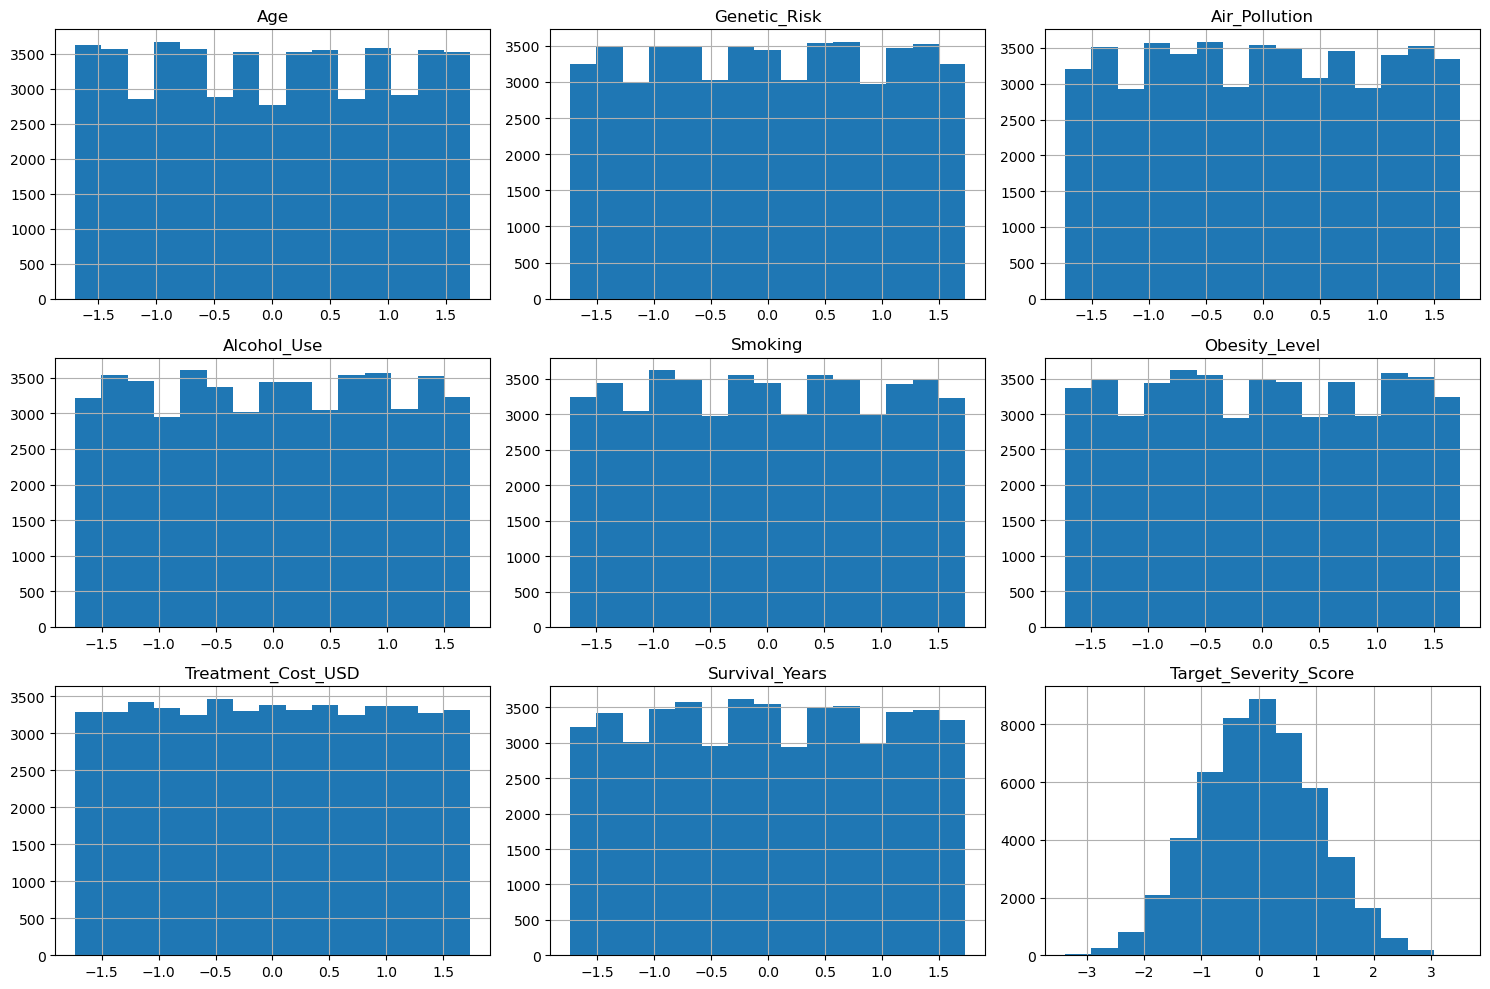

In [28]:
# Histograms for numerical features
df[numerical_features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


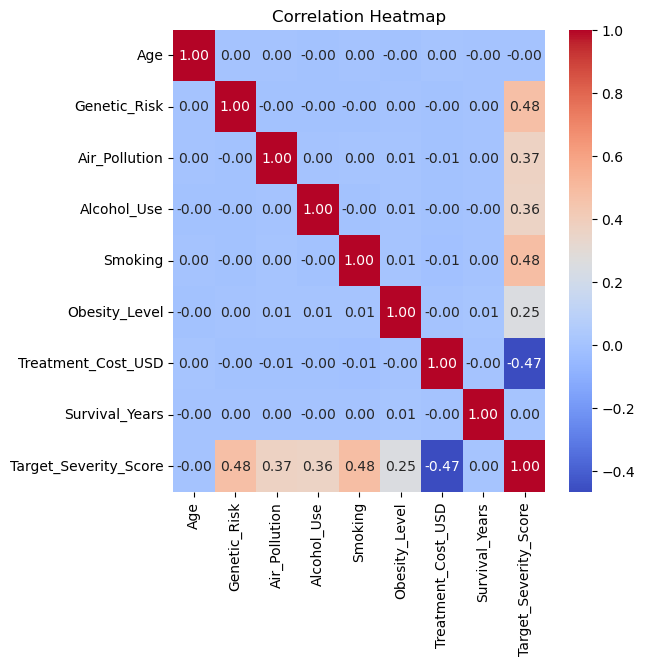

In [29]:
# Correlation heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


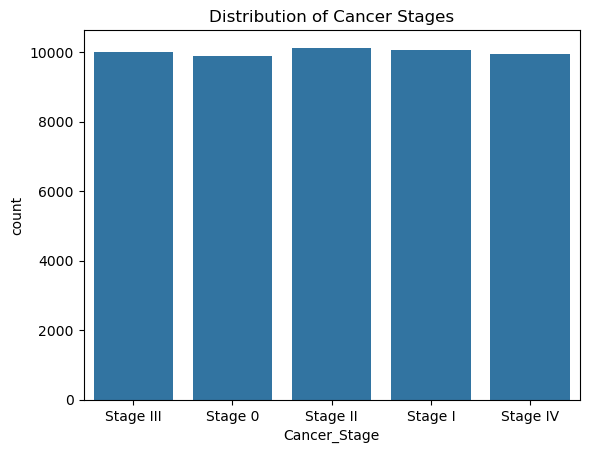

In [30]:
# Count plot for target variable
sns.countplot(x='Cancer_Stage', data=df)
plt.title('Distribution of Cancer Stages')
plt.show()


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
df = pd.read_csv('global_cancer_patients_2015_2024.csv')

# Drop irrelevant columns
df = df.drop(columns=['Patient_ID'])

# Encode categorical columns
categorical_cols = ['Gender', 'Country_Region', 'Cancer_Stage', 'Cancer_Type']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

# Define features and target
X = df.drop(columns=['Cancer_Type'])  # features
y = df['Cancer_Type']  # target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.1255
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.03      0.05      1262
           1       0.12      0.04      0.06      1231
           2       0.13      0.26      0.17      1283
           3       0.13      0.11      0.12      1233
           4       0.12      0.12      0.12      1259
           5       0.12      0.12      0.12      1230
           6       0.12      0.13      0.13      1269
           7       0.13      0.19      0.15      1233

    accuracy                           0.13     10000
   macro avg       0.12      0.13      0.12     10000
weighted avg       0.12      0.13      0.12     10000

